In [1]:
## Notebook simulates a barrier island and also writes out
## dtopo files for geoclaw to use as bathymetry

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import seaborn as sns
from matplotlib.animation import FuncAnimation
from clawpack.geoclaw import topotools
import os

<IPython.core.display.Javascript object>


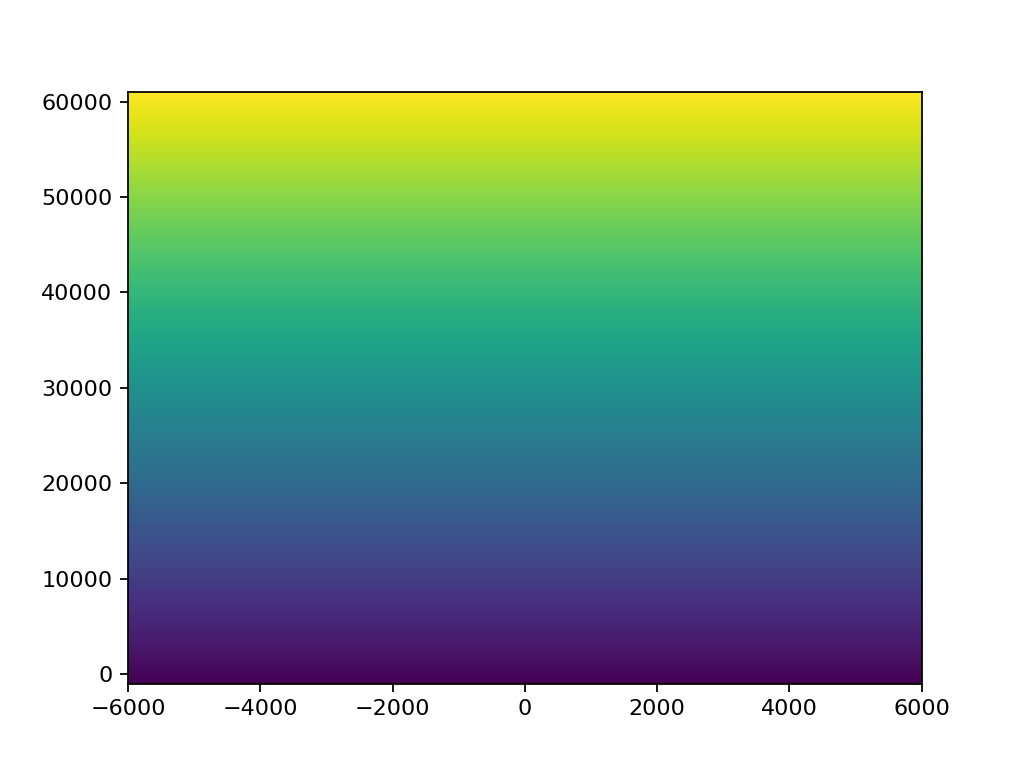

In [2]:
### Define the domain with a slope averaged from North Carolina shelf
beach_slope = 34/59e3 #slope 34 m of elevation over 59 km of distance
x = np.linspace(-6e3, 6e3, 120) #(m) width of the barrier island
y = np.linspace(-1e3, 61e3, 620) #(m) length of the domain
X, Y = np.meshgrid(x, y)
b0 = 34 # y intercept where water and beach meet
h0 = -.22 #(m) at y=0
def sloping_topo(X, Y, beach_slope, b0):
    bathy = beach_slope * Y - b0
    plt.figure()
    plt.pcolor(X, Y, bathy)
    plt.show()
    return bathy
bathymetry = sloping_topo(X, Y, beach_slope, b0)


<IPython.core.display.Javascript object>


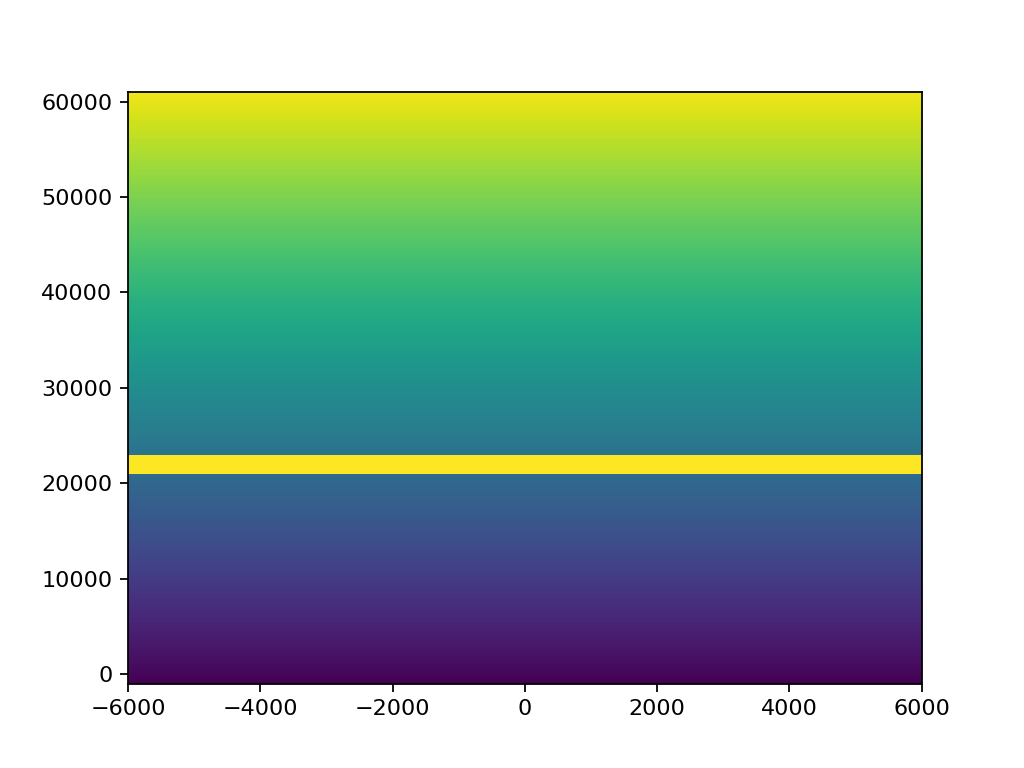

In [7]:
# Define island dimensions
y_island = 22e3 # (m) location of the island up the shelf
h = 2 # (m) height at center of island
island_width = 2e3 # (m)
# width of the island's base in the ocean
island_base = island_width/(np.cos(beach_slope))
# 
island_points = island_base/2
i0 = y_island - island_points
i1 = y_island + island_points

l1 = 2# (y >= i0)*(y<=i1)*np.ones(bathy.shape)*bathy
island = ( (Y < i0) * bathymetry + 
         (Y >= i0) * (Y <= i1)*(np.ones(bathymetry.shape)*l1) + 
         (Y > i1) * bathymetry)
plt.figure()
plt.pcolor(X, Y, island)
plt.show()


In [4]:
# Import geoclaw functions
CLAW = os.environ['CLAW']
import scipy.interpolate as interpolate
X, Y = np.meshgrid(x, y)

In [8]:
# create topography based on the simulated shelf
topo = topotools.Topography()
topo.x = x
topo.y = y
topo.Z = island

<IPython.core.display.Javascript object>


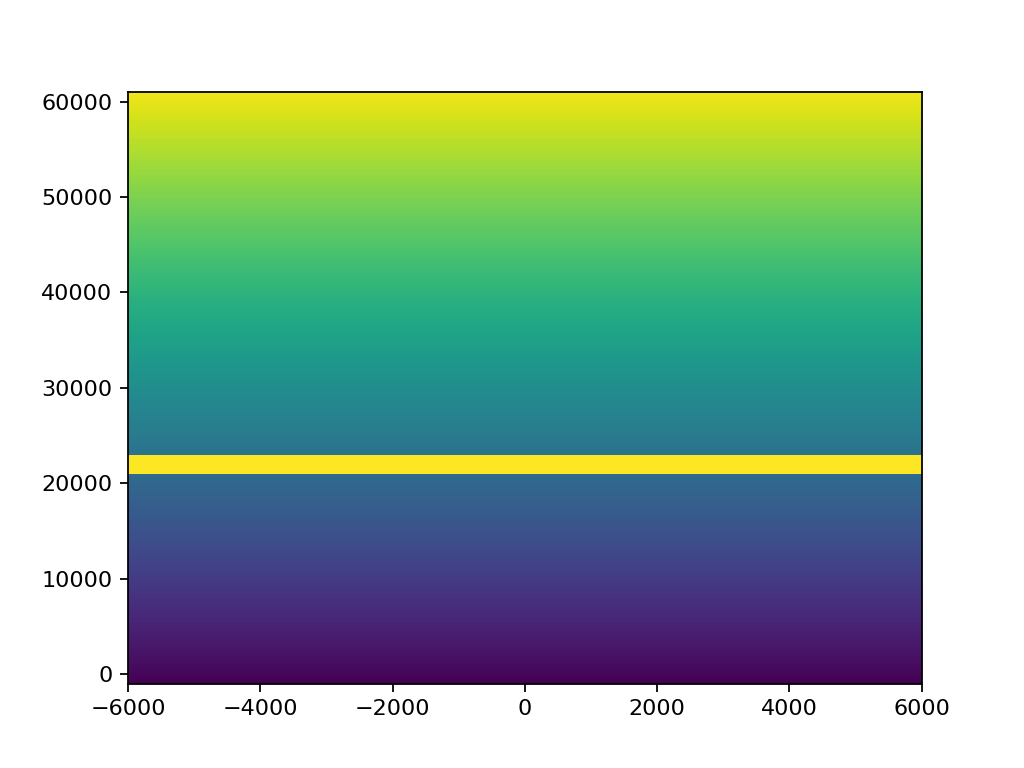

(620, 120) (620, 120) (620, 120)


In [9]:
# Make sure this plots
plt.figure()
plt.pcolor(topo.X, topo.Y, topo.Z)
print(np.shape(topo.X), np.shape(topo.Y), np.shape(topo.Z))
plt.show()

In [8]:
# generate the 2d grid and save the file
topo.generate_2d_coordinates()
topo.write(path="./test.tt3", topo_type=3)


<IPython.core.display.Javascript object>


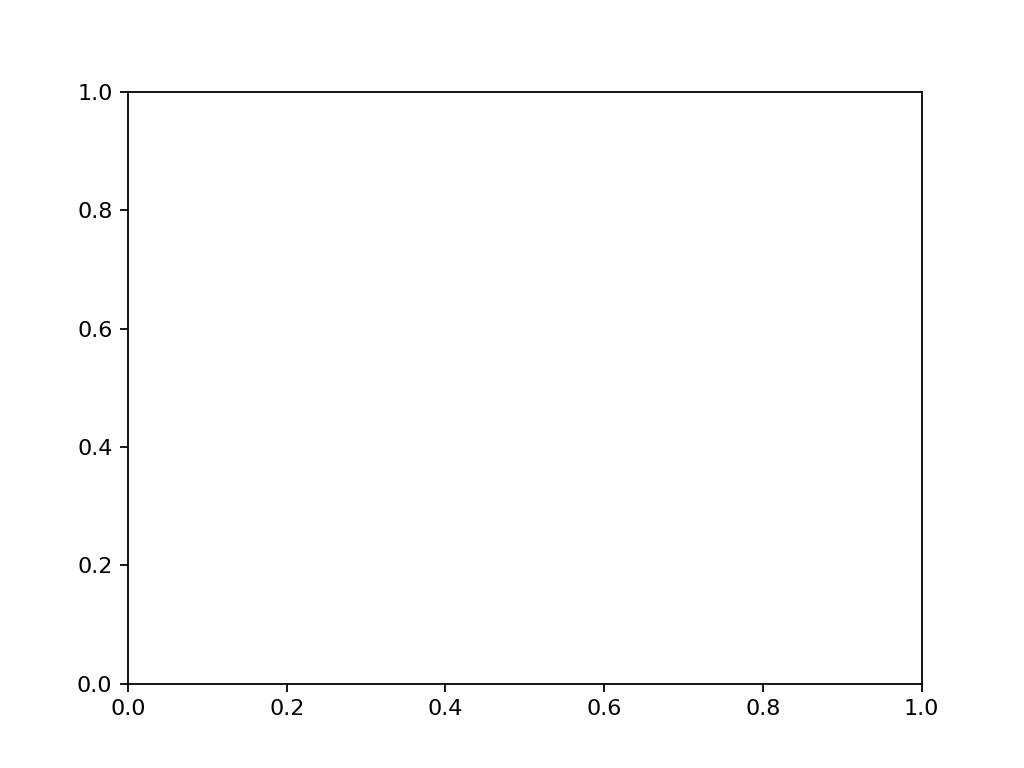

<IPython.core.display.Javascript object>


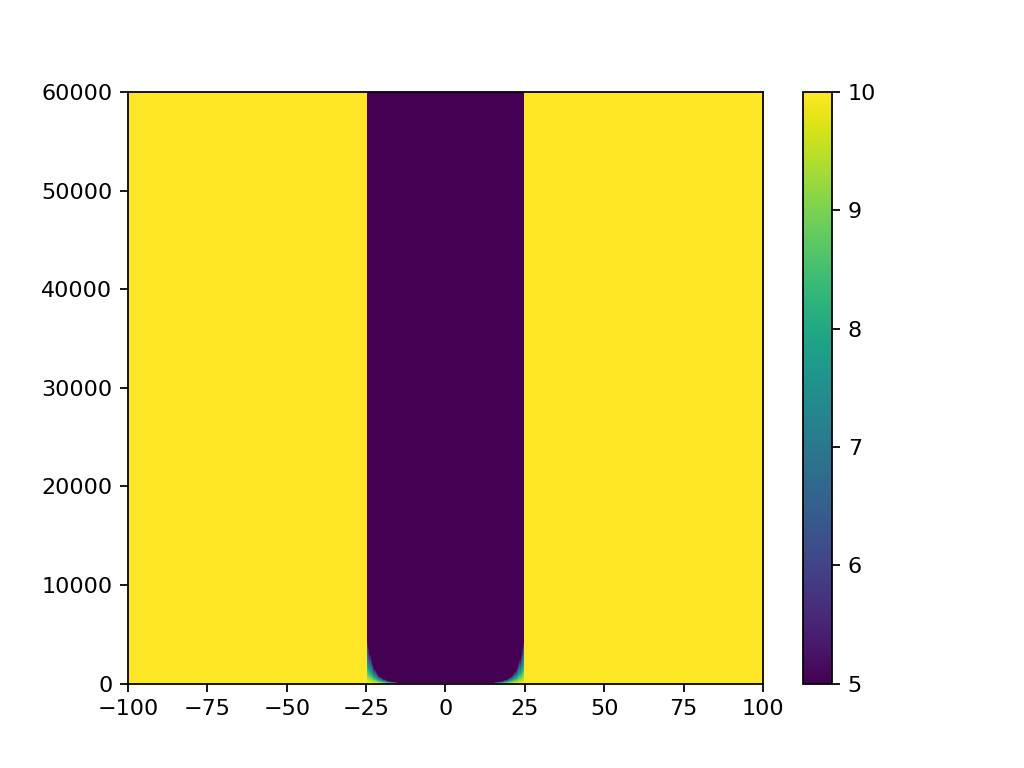

In [10]:
fig, ax = plt.subplots()
time = np.linspace(0.0, 10.0, 10)
y = np.linspace(0.0, 60e3, 600)
x = np.linspace(-100, 100, 500)
X, Y = np.meshgrid(x, y)
t1 = 3.0
t2 = 6.0
A_max = 5.0
A1 = (  (time < t1) * np.zeros(time.shape) 
      + (t1 <= time) * (time < t2) * (A_max / (t2-t1) * (time - t1)) 
      + (t2 <= time) * np.ones(time.shape) * A_max)
A2 = .2*y
sigma = 10.0
h0 = 10
x1 = -25.0
x2 = 25.0
mu = 1.0
plt.figure()
for i in range(len(A1)):
    breach = np.ones(X.shape) * h0
    breach -= A1[i] * np.exp(-X**2 / sigma**2) * (0.10 * Y)  * (x1 <= X) * (X <= x2)
    plt.clf()
#     plt.figure()
    plt.pcolor(X, Y, breach, vmin=5, vmax=h0)
    plt.colorbar()
    plt.show()

In [11]:
from clawpack.geoclaw import dtopotools
dtopo = dtopotools.DTopography()

<IPython.core.display.Javascript object>


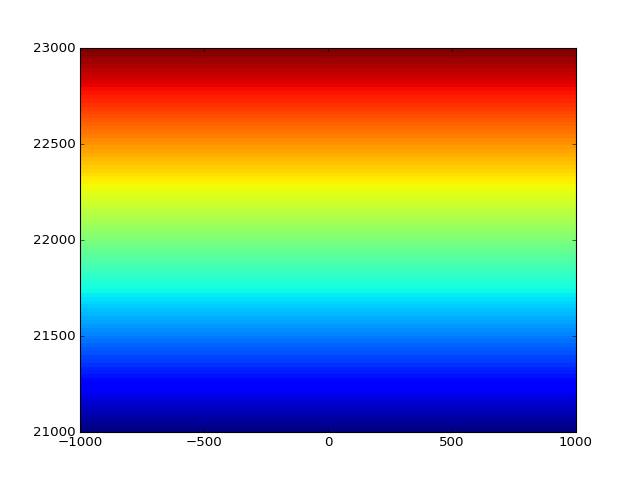

<IPython.core.display.Javascript object>


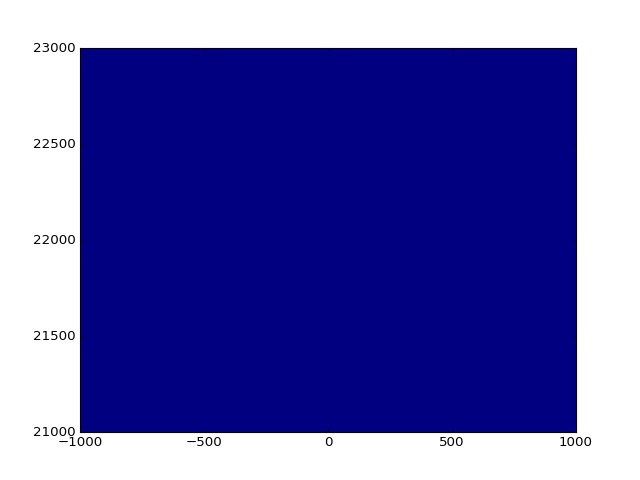

In [12]:
x_dtopo = np.linspace(-1e3, 1e3, 20)
y_dtopo = np.linspace(21e3, 23e3, 100)
X_dtopo, Y_dtopo = np.meshgrid(x_dtopo, y_dtopo)
beach_slope = 34/59e3

b0 = 34 # y intercept where water and beach meet
h0 = -.22 #(m) at y=0
# def sloping_topo(x, y, beach_slope, b0, h):
bathy_dtopo = beach_slope * Y_dtopo - b0

plt.figure()
plt.pcolor(X_dtopo, Y_dtopo, bathy_dtopo)
# return bathy
plt.show()
island_dtopo = ( (Y_dtopo < i0) * bathy_dtopo + 
         (Y_dtopo >= i0) * (Y_dtopo <= i1)*(np.ones(bathy_dtopo.shape)*l1) + 
         (Y_dtopo > i1) * bathy_dtopo)
plt.figure()
plt.pcolor(X_dtopo, Y_dtopo, island_dtopo)
z_dtopo = island_dtopo

<IPython.core.display.Javascript object>


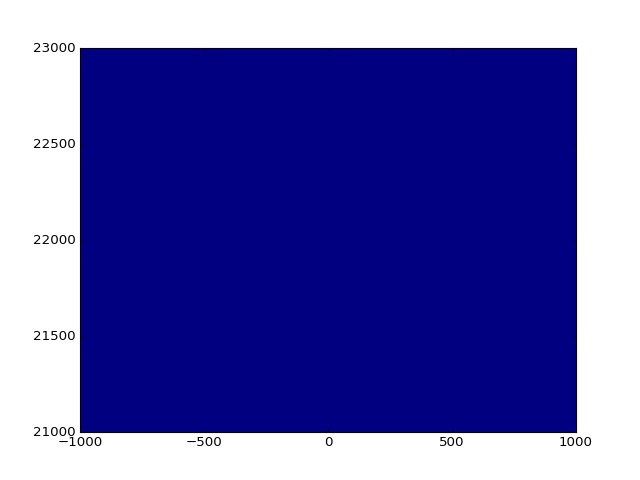

<IPython.core.display.Javascript object>


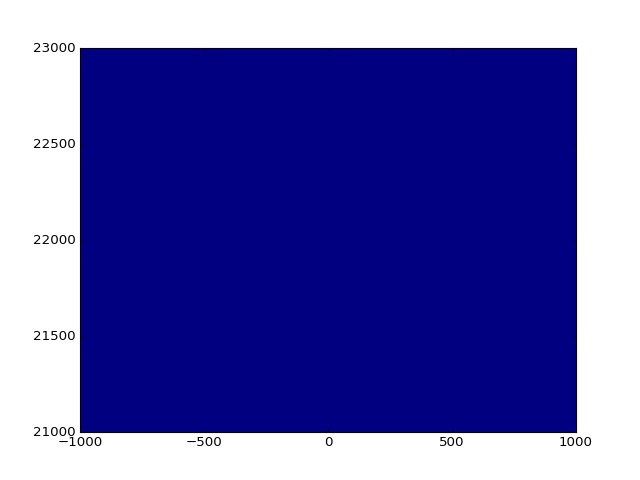

<IPython.core.display.Javascript object>


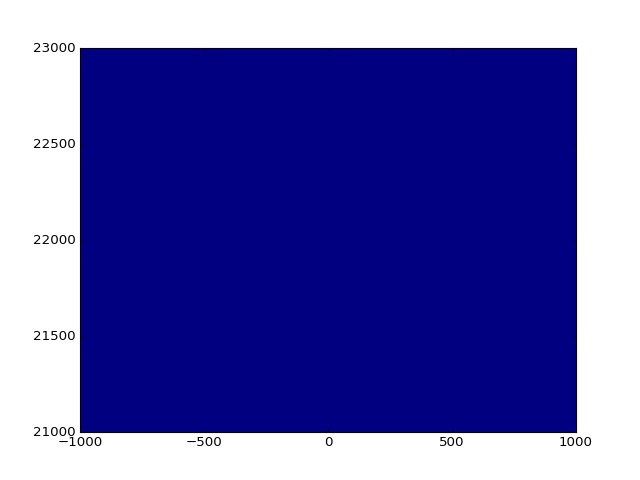

<IPython.core.display.Javascript object>


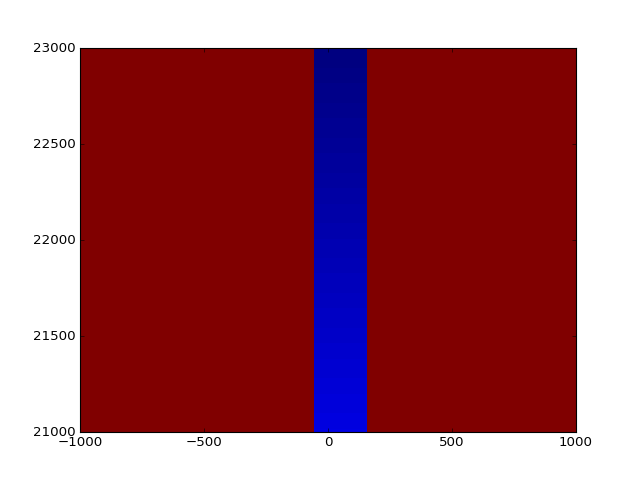

/home/catherinej/.pyenv/versions/3.6.0/envs/claw3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


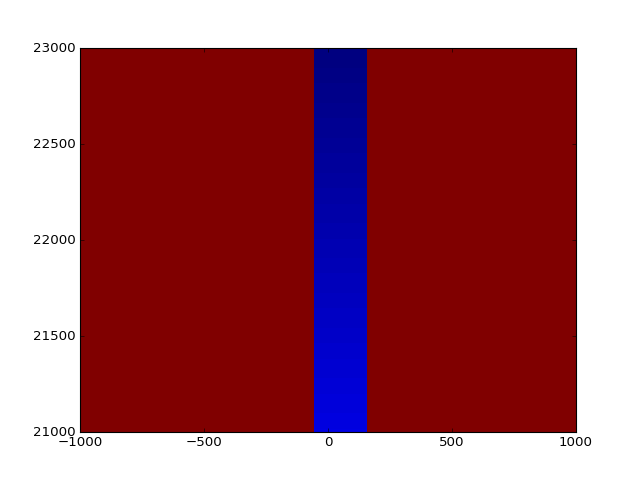

<IPython.core.display.Javascript object>


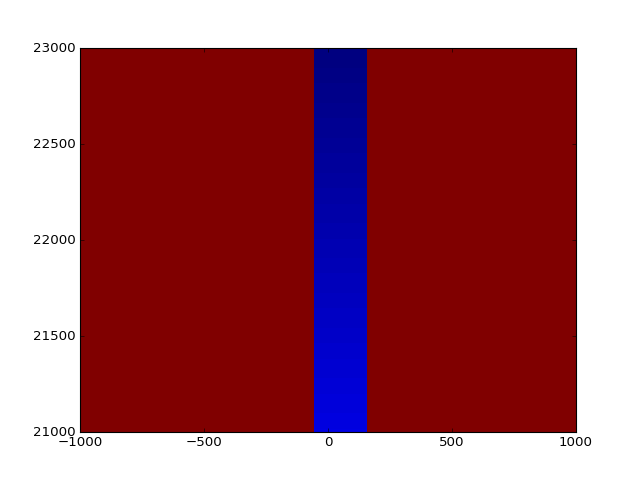

<IPython.core.display.Javascript object>


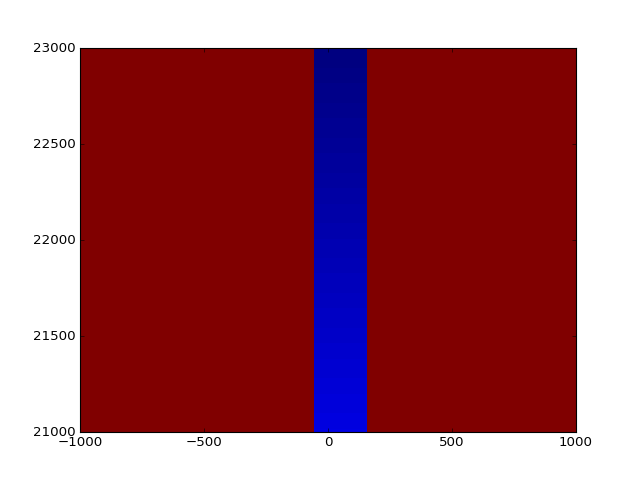

<IPython.core.display.Javascript object>


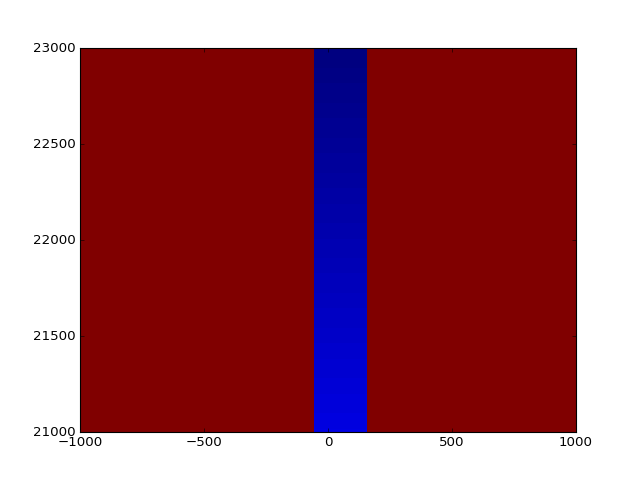

<IPython.core.display.Javascript object>


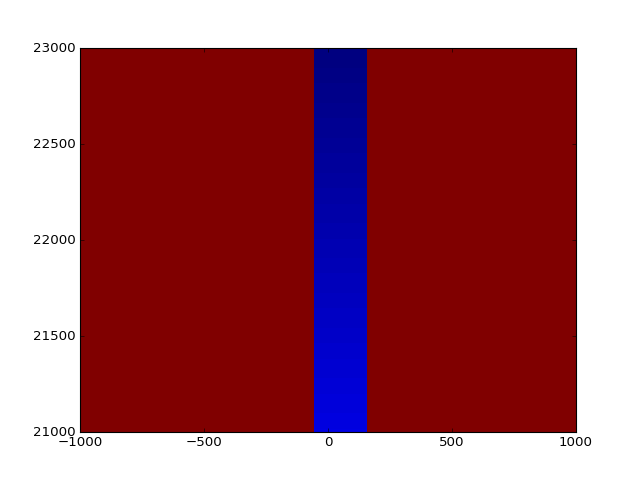

<IPython.core.display.Javascript object>


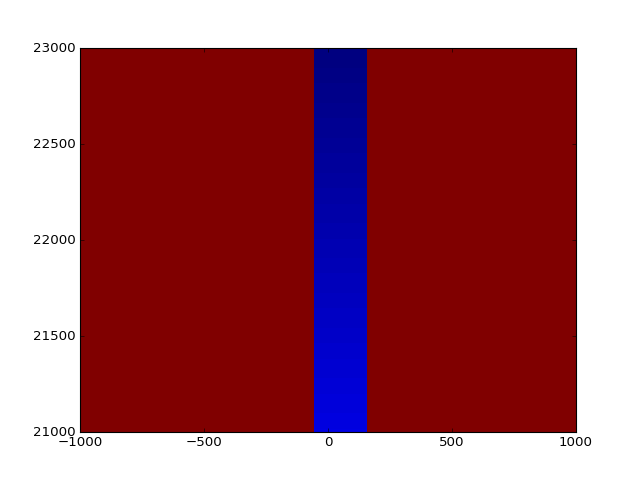

In [13]:
i_breach = []
sigma = 10.0
h0 = 10
x1 = -100.0
x2 = 100.0
mu = 1.0
for i in range(len(A1)):
    breach = np.ones(X_dtopo.shape) * h0
    breach -= A1[i] * np.exp(-X_dtopo**2 / sigma**2) * (0.10 * Y_dtopo)  * (x1 <= X_dtopo) * (X_dtopo <= x2)
    i_breach.append(breach)
    plt.figure()
    plt.pcolor(X_dtopo, Y_dtopo, breach)
b = np.asarray(i_breach)
dtopo.dZ = -b
dtopo.times = time
dtopo.X = X_dtopo
dtopo.Y = Y_dtopo
dtopo.write('.dtopo.tt3')


In [88]:
dtopo.write('./dtopo.tt3')

In [27]:
time

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

<IPython.core.display.Javascript object>


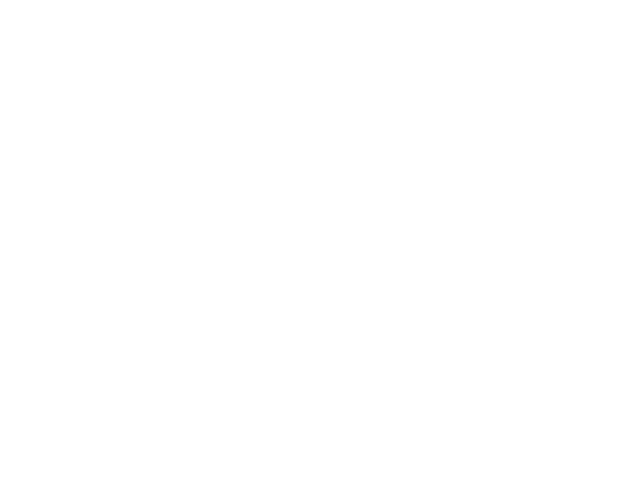

In [15]:
topo.plot()

<IPython.core.display.Javascript object>


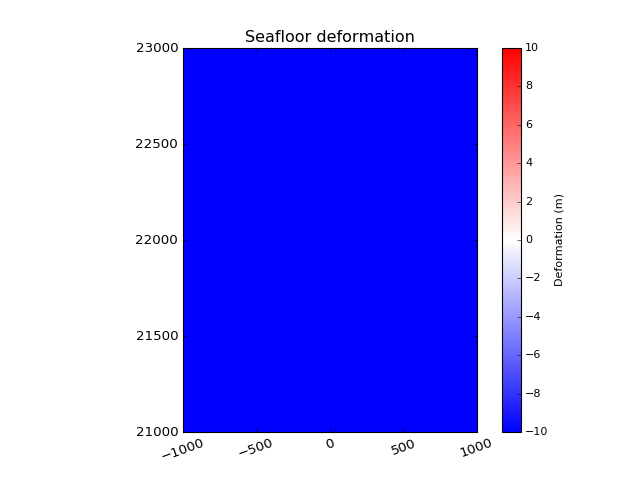

<IPython.core.display.Javascript object>


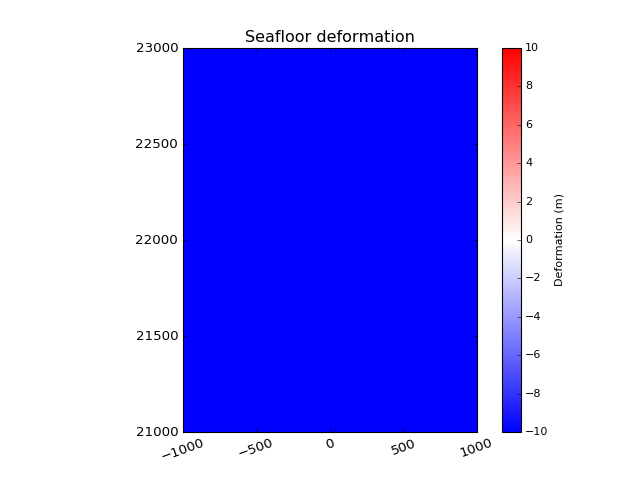

<IPython.core.display.Javascript object>


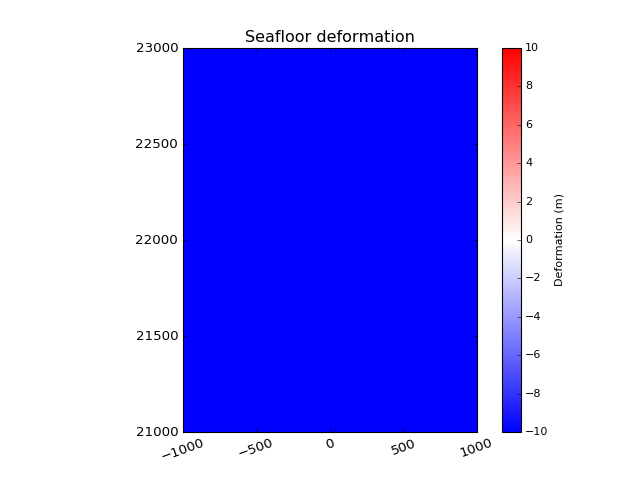

<IPython.core.display.Javascript object>


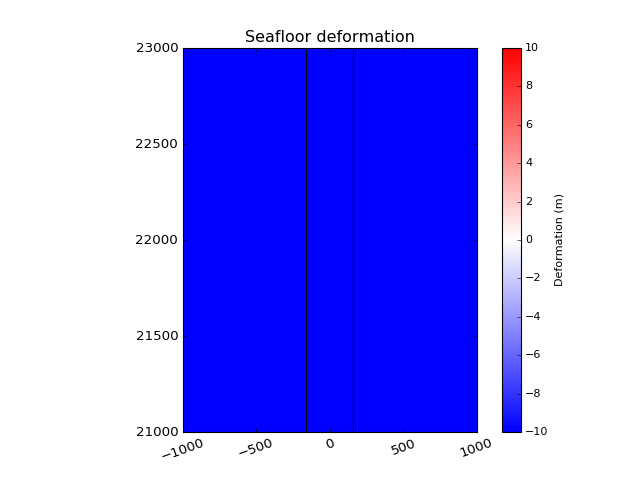

<IPython.core.display.Javascript object>


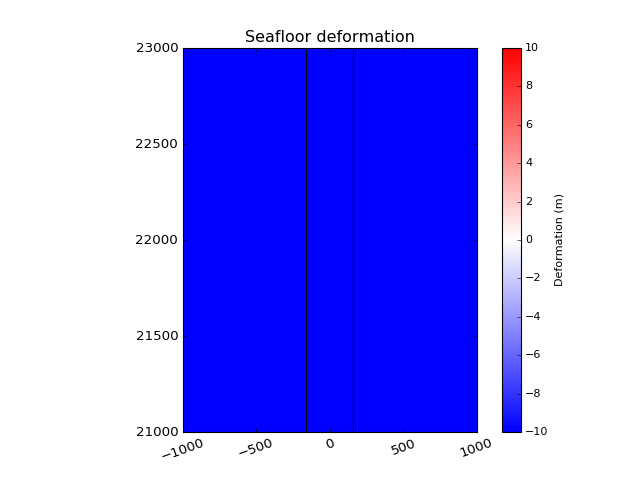

<IPython.core.display.Javascript object>


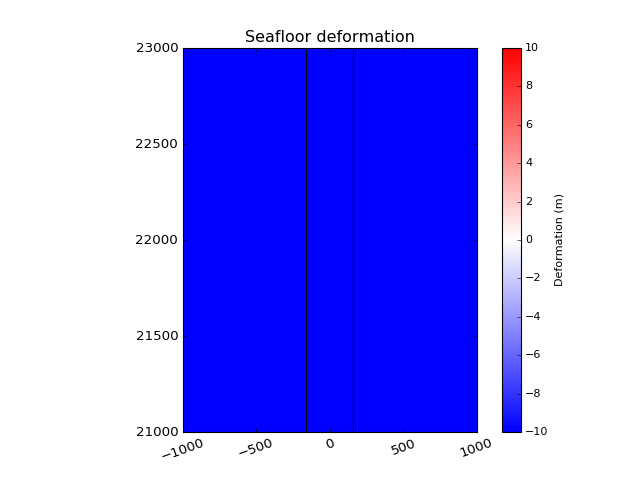

<IPython.core.display.Javascript object>


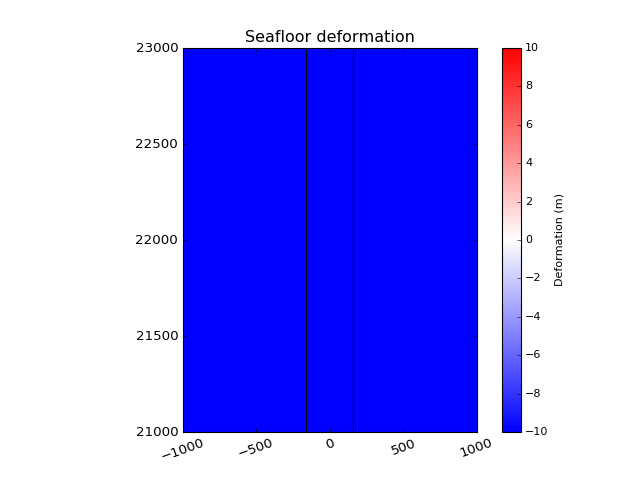

<IPython.core.display.Javascript object>


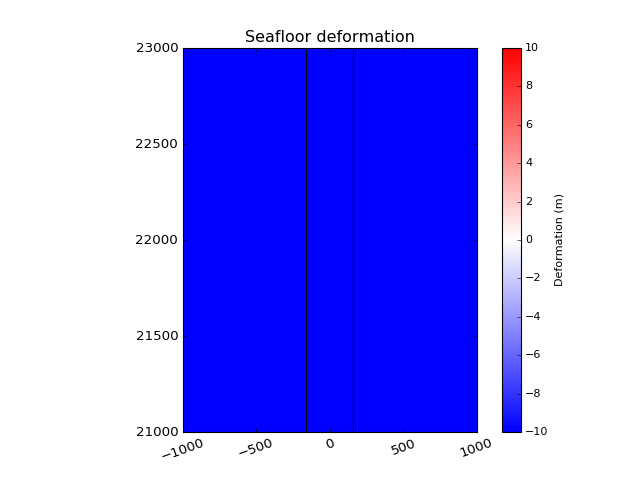

<IPython.core.display.Javascript object>


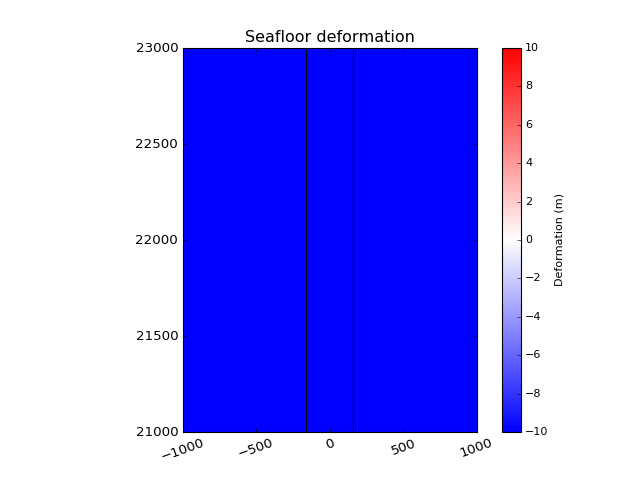

<IPython.core.display.Javascript object>


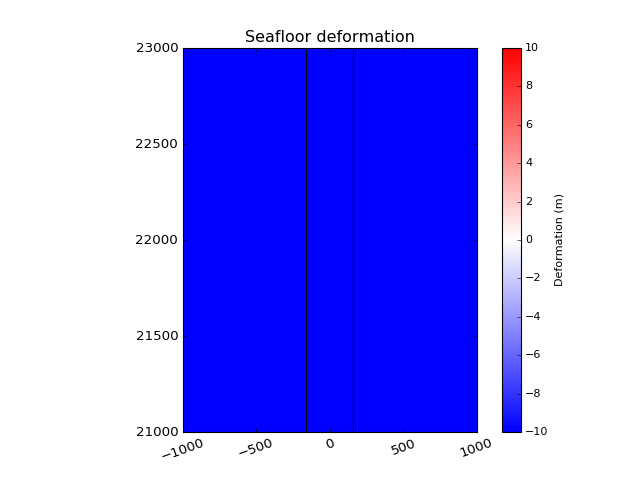

In [28]:
for t in time:
    dtopo.plot_dZ_colors(t=t)